In [1]:
import pandas as pd

# Data visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Data preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Machine Learning Packages
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegressionCV
from sklearn.naive_bayes import GaussianNB, CategoricalNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

# Prediction Metrics
from sklearn.metrics import classification_report, accuracy_score

## Load all of the csv's from data folder

In [9]:
from os import listdir, getcwd
from pathlib import Path
def load_data(filename=None):
    """
    Loads the timeline data from the data folder.
    """
    # Join file locaition from absolute path to root
    ROOT_PATH = str(Path(getcwd()).parents[0])
    DATA_LOC = ROOT_PATH + '/data/'
    
    if filename:
        return pd.read_csv(DATA_LOC+filename)

    # try to get Get all directory file names
    files_names = listdir(DATA_LOC)
    
    # Check Type
    valid_file_names = [f for f in files_names if f.split('.')[1] == 'csv']
    
    # Load Pickle Files
    dataframes = []
    for filename in valid_file_names:
        if filename.split('_')[0] == "UNSEENDATA":
            continue
        dataframes.append(pd.read_csv(DATA_LOC+filename))
    return dataframes

In [10]:
# Load completely new data that is never seen before
testing_df = load_data('UNSEENDATA_oWill.csv')

In [3]:
dataframes = load_data()

In [4]:
# Successfully got all of the data!
len(dataframes)

44

In [6]:
# Combines the dataframes
df = pd.concat(dataframes)

In [14]:
df = df.drop('Unnamed: 0', axis=1)

In [15]:
df.shape

(24713, 35)

In [16]:
df.columns

Index(['blue_gold', 'blue_cs', 'blue_jg', 'blue_xp', 'red_gold', 'red_cs',
       'red_jg', 'red_xp', 'blue_wards_placed', 'blue_wards_destroyed',
       'blue_air_dragons', 'blue_fire_dragons', 'blue_earth_dragons',
       'blue_water_dragons', 'blue_turrets_destroyed', 'blue_rift_heralds',
       'blue_inhibitors_destroyed', 'blue_kills', 'blue_assists',
       'blue_deaths', 'red_wards_placed', 'red_wards_destroyed',
       'red_air_dragons', 'red_fire_dragons', 'red_earth_dragons',
       'red_water_dragons', 'red_turrets_destroyed', 'red_rift_heralds',
       'red_inhibitors_destroyed', 'red_kills', 'red_assists', 'red_deaths',
       'unix_date', 'winner', 'match_id'],
      dtype='object')

## Next, let's get an overview of the data we're working with
### Features
Each feature listed below is split into different teams, with the prefixes of "blue_" and "red_".
<ul> 
<li>Gold: Total gold accumulated. (Gold can be used to purchase items which can increase a player's strength.)</li>
<li>CS: Number creeps killed. (Killing a creep gives different amounts of gold.)</li>
<li>JG: Number of jungle creeps killed. (Same as above.)</li>
<li>XP: Total experience accumulated. (This is gained from killing enemies, being in the vicinity of a creep kill, or killing an object.</li>
<li>Wards Placed: Number of wards placed. (Wards reveal areas of the map to spot enemies.)</li>
<li>Wards Destroyed: Number of enemy wards destroyed.</li>
<li>Dragons: Number of that type of dragon killed. (Different dragon types give different advantages to the team that kills them.)</li>
<li>Heralds: Number of heralds killed. (These give gold, xp, and when used can do significant damage to towers.)</li>
<li>Turrets Destroyed: Number of enemy turrets destroyed. (Killing a turret opens up parts of the map.)</li>
<li>Inhibs Destroyed: Number of enemy inhibitors destroyed. (Killing an inhib allows your team to have stronger creeps in that lane.)</li>
<li>Kills: Number of enemies killed.</li>
<li>Assists: Number of assists on an enemy killed.</li>
<li>Deaths: Number of deaths of the team.</li>
</ul>

### Target
Winner: The team which one the game.

In [17]:
# We have no nulls and everything is an integer besides our target.
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24713 entries, 0 to 403
Data columns (total 35 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   blue_gold                  24713 non-null  int64 
 1   blue_cs                    24713 non-null  int64 
 2   blue_jg                    24713 non-null  int64 
 3   blue_xp                    24713 non-null  int64 
 4   red_gold                   24713 non-null  int64 
 5   red_cs                     24713 non-null  int64 
 6   red_jg                     24713 non-null  int64 
 7   red_xp                     24713 non-null  int64 
 8   blue_wards_placed          24713 non-null  int64 
 9   blue_wards_destroyed       24713 non-null  int64 
 10  blue_air_dragons           24713 non-null  int64 
 11  blue_fire_dragons          24713 non-null  int64 
 12  blue_earth_dragons         24713 non-null  int64 
 13  blue_water_dragons         24713 non-null  int64 
 14  blue_tur

In [18]:
df.describe()

,blue_gold,blue_cs,blue_jg,blue_xp,red_gold,red_cs,red_jg,red_xp,blue_wards_placed,blue_wards_destroyed,...,red_fire_dragons,red_earth_dragons,red_water_dragons,red_turrets_destroyed,red_rift_heralds,red_inhibitors_destroyed,red_kills,red_assists,red_deaths,unix_date
count,24713.000000,24713.000000,24713.000000,24713.000000,24713.000000,24713.000000,24713.000000,24713.000000,24713.000000,24713.000000,...,24713.000000,24713.000000,24713.000000,24713.000000,24713.000000,24713.000000,24713.000000,24713.000000,24713.000000,2.471300e+04
mean,26270.005260,321.422854,81.600008,28984.939667,26252.566908,322.546554,83.666046,29102.318577,24.735362,5.618784,...,0.209890,0.214543,0.217902,0.616518,0.363048,0.001619,11.548820,12.403998,11.564480,1.622294e+12
std,2894.980752,41.902931,15.460828,2143.734811,2871.824562,42.167432,15.619454,2157.287478,4.565436,2.881562,...,0.407238,0.410513,0.412828,0.846382,0.481897,0.042165,4.654784,6.267425,4.718498,8.414153e+09
min,16727.000000,116.000000,0.000000,16943.000000,15032.000000,126.000000,0.000000,18046.000000,3.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.607601e+12
25%,24252.000000,295.000000,72.000000,27588.000000,24267.000000,296.000000,72.000000,27690.000000,22.000000,4.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,8.000000,8.000000,1.615064e+12
50%,26089.000000,324.000000,81.000000,28982.000000,26078.000000,325.000000,84.000000,29131.000000,25.000000,5.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,11.000000,12.000000,11.000000,1.621099e+12
75%,28093.000000,351.000000,92.000000,30408.000000,28076.000000,352.000000,94.000000,30539.000000,28.000000,7.000000,...,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,14.000000,16.000000,14.000000,1.630219e+12
max,38326.000000,459.000000,146.000000,37106.000000,40144.000000,468.000000,147.000000,37272.000000,111.000000,23.000000,...,1.000000,1.000000,1.000000,8.000000,2.000000,2.000000,39.000000,75.000000,43.000000,1.636983e+12


### Distribution of target
We have a good distribution of the target variable! These are from random samples, so maybe we can assume our data is also normally distributed?

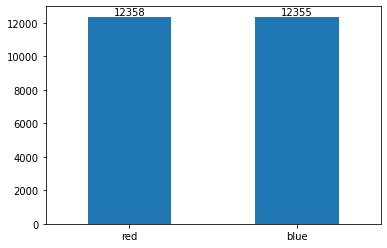

In [19]:
ax = df['winner'].value_counts().plot.bar(rot=0)
for container in ax.containers:
    ax.bar_label(container)
plt.show()

### Distributions of the target in regards to the features

In [20]:
def compare_by_winner(feature, data):
    # Get subset with winner
    sub_blue = data[data['winner'] == 'blue']
    sub_red = data[data['winner'] == 'red']

    cols = [col for col in data.columns if feature.lower() in col.lower()]

    fig, ax = plt.subplots(1, 2, figsize=(10, 8))

    # Plot when blue wins
    sns.boxplot(ax=ax[0], data=sub_blue[cols])
    ax[0].set_title("Blue Win")

    # Plot when red wins
    sns.boxplot(ax=ax[1], data=sub_red[cols])
    ax[1].set_title("Red Win")


### Gold

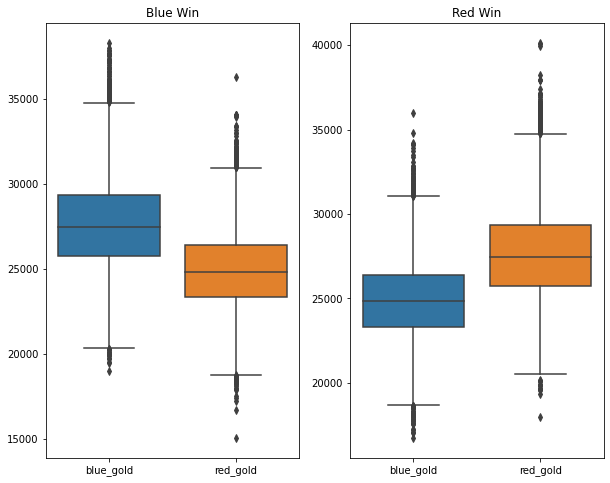

In [21]:
compare_by_winner('gold', df)

### Creep Score (CS)

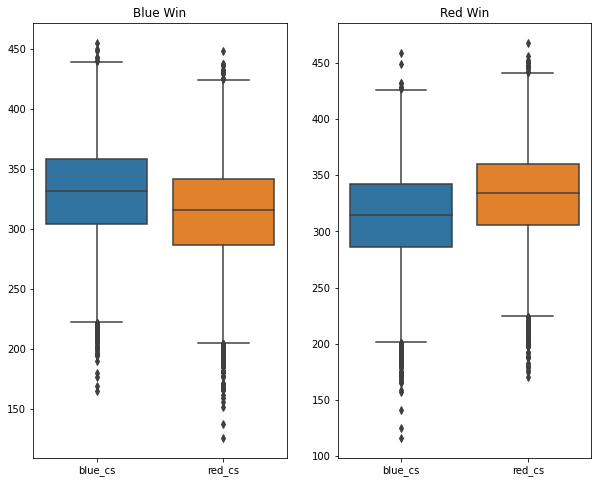

In [22]:
compare_by_winner('cs', df)

### Experience (XP)

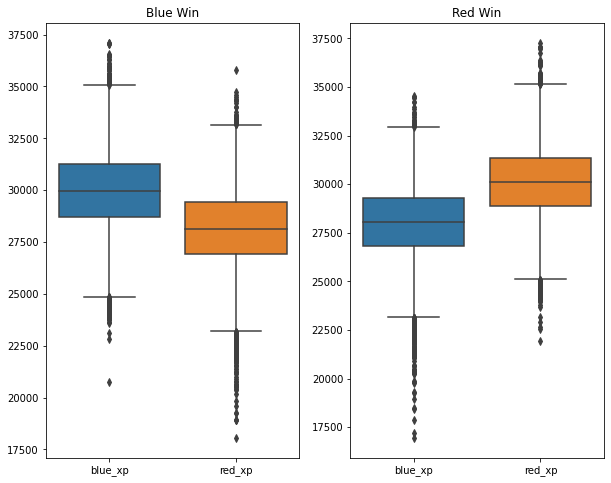

In [23]:
compare_by_winner('xp', df)

### Jungle (JG)

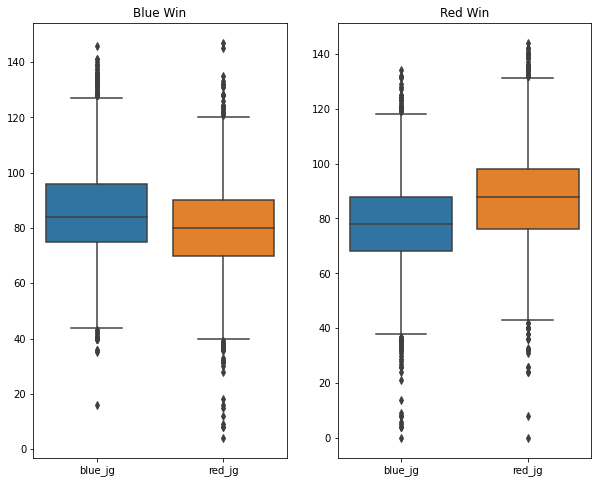

In [24]:
compare_by_winner('jg', df)

### Wards Placed

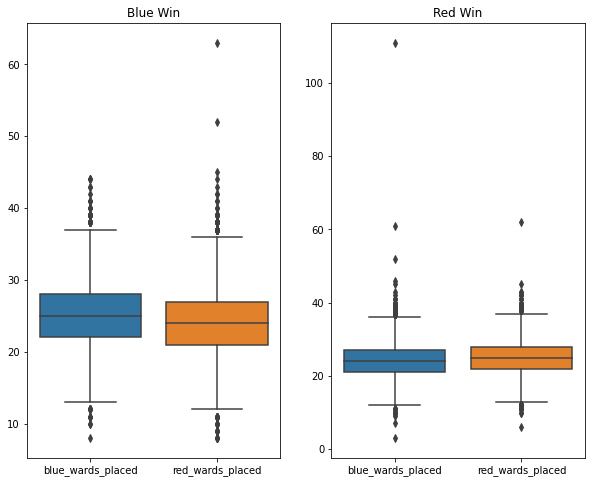

In [25]:
compare_by_winner('wards_placed', df)

### Wards Destroyed

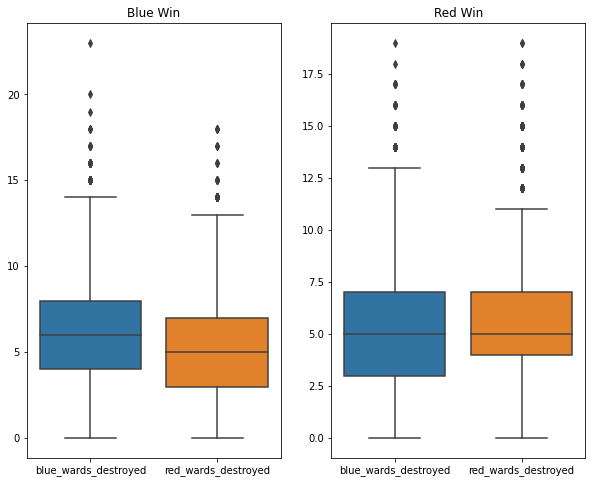

In [26]:
compare_by_winner('wards_destroyed', df)

### Fire Dragons

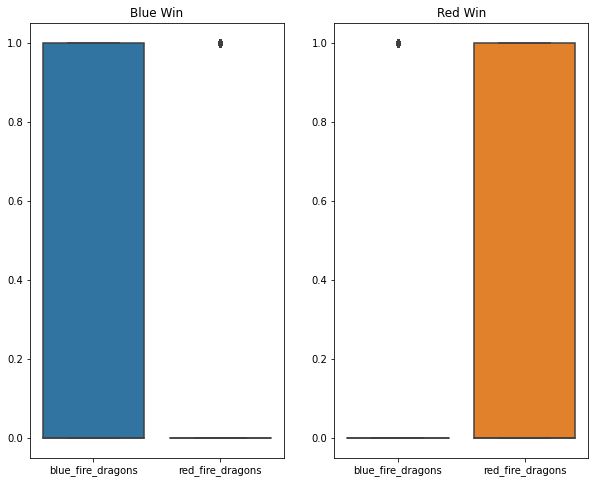

In [27]:
compare_by_winner('fire_dragons', df)

### Air Dragons

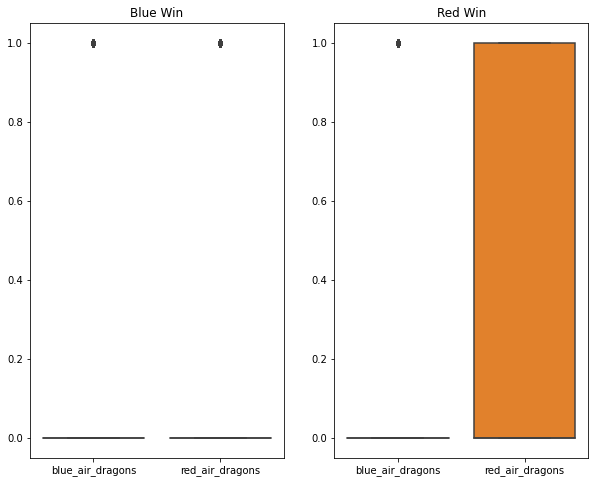

In [28]:
compare_by_winner('air_dragons', df)

### Water Dragons

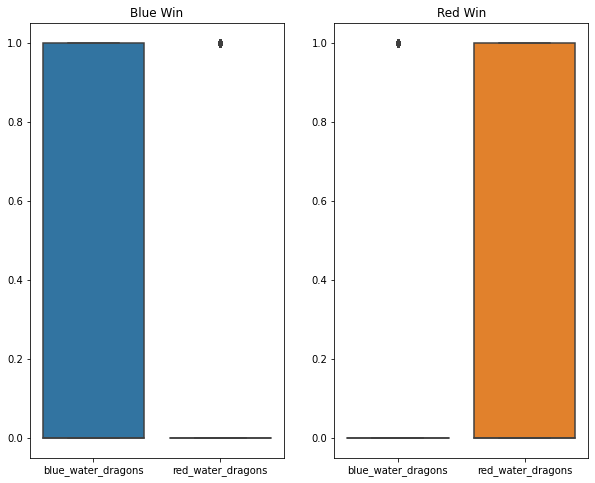

In [29]:
compare_by_winner('water_dragons', df)

### Earth Dragons

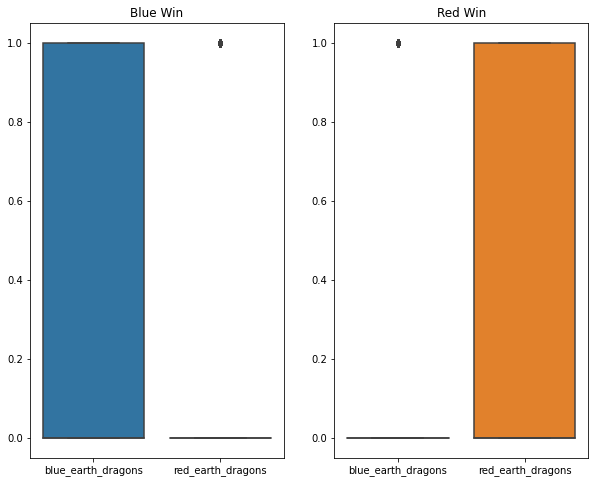

In [30]:
compare_by_winner('earth_dragons', df)

### Heralds

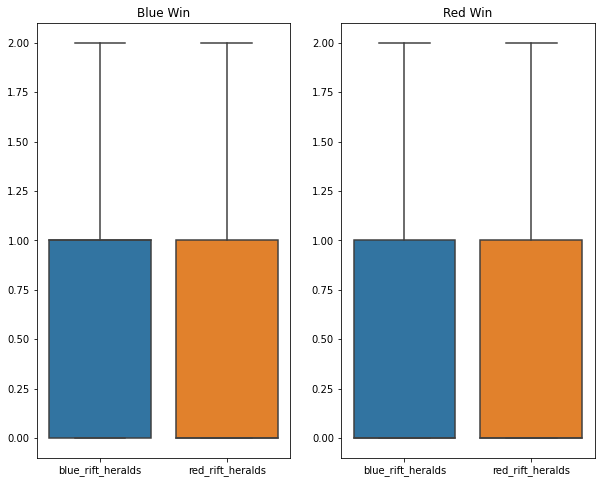

In [31]:
compare_by_winner('heralds', df)

### Turrets Destroyed

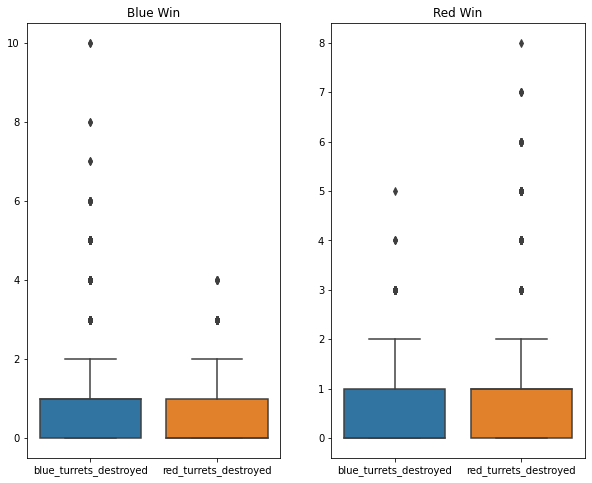

In [32]:
compare_by_winner('turrets_destroyed', df)

### Inhibs Destroyed

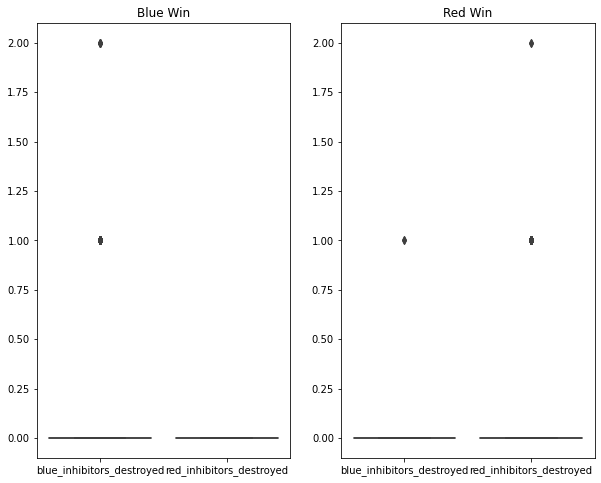

In [33]:
compare_by_winner('inhibitors_destroyed', df)

## Now, let's look at the distribution of some of our features

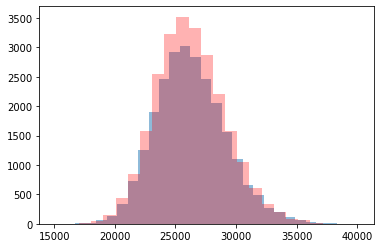

In [34]:
plt.hist(x=df['blue_gold'], bins=25, alpha=0.5)
plt.hist(x=df['red_gold'], bins=25, color='red', alpha=0.3)
plt.show()

### Experience

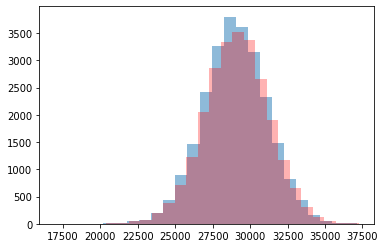

In [35]:
plt.hist(x=df['blue_xp'], bins=25, alpha=0.5)
plt.hist(x=df['red_xp'], bins=25, color='red', alpha=0.3)
plt.show()

## Now, let's prepare this dataset for the models

First, let's remove the values which have colinearity with each other. For example, blue kills = red deaths, blue deaths = red kills, etc.

In [36]:
df.head(5)

,blue_gold,blue_cs,blue_jg,blue_xp,red_gold,red_cs,red_jg,red_xp,blue_wards_placed,blue_wards_destroyed,...,red_water_dragons,red_turrets_destroyed,red_rift_heralds,red_inhibitors_destroyed,red_kills,red_assists,red_deaths,unix_date,winner,match_id
0,25691,250,72,27821,19835,231,59,24814,28,2,...,0,0,0,0,6,4,13,1634867567884,blue,NA1_4078001101
1,25076,262,69,25826,28182,257,55,29093,22,4,...,0,2,1,0,19,14,17,1636825025208,blue,NA1_4101915154
2,20127,246,64,26263,26342,268,97,29256,20,2,...,1,1,1,0,14,10,5,1634820716873,red,NA1_4077583193
3,26113,237,84,29261,25074,238,68,29710,18,2,...,0,0,0,0,15,13,15,1624056777808,blue,NA1_3948304495
4,23854,243,70,26088,24050,291,90,29026,21,3,...,0,0,1,0,9,6,7,1624560077188,red,NA1_3954960882


In [41]:
# Seperate target and features
prep_df = df.drop(['red_kills', 'red_deaths', 'winner', 'match_id'], axis=1)
target = df['winner']

### Standardize values

In [42]:
min_max_scalar = MinMaxScaler()

In [43]:
X = min_max_scalar.fit_transform(prep_df)

In [44]:
random_state=101

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, target, test_size=0.25, random_state=random_state)

## Logistic Regression CV

In [46]:
logm = LogisticRegressionCV(cv=5, random_state=random_state, max_iter=4000)
logm.fit(X_train, y_train)
predictions = logm.predict(X_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

        blue       0.77      0.77      0.77      3120
         red       0.77      0.77      0.77      3059

    accuracy                           0.77      6179
   macro avg       0.77      0.77      0.77      6179
weighted avg       0.77      0.77      0.77      6179



## Support Vector Classifier

In [63]:
svm = SVC(random_state=random_state, probability=True)
svm.fit(X_train, y_train)
predictions = svm.predict(X_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

        blue       0.77      0.78      0.77      3120
         red       0.77      0.76      0.76      3059

    accuracy                           0.77      6179
   macro avg       0.77      0.77      0.77      6179
weighted avg       0.77      0.77      0.77      6179



## KNN With GridSearch

In [48]:
knn_grid_params = {
    'n_neighbors': [3, 5, 11, 19],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}
knn = KNeighborsClassifier()
knn_gs = GridSearchCV(knn, knn_grid_params, verbose=1, cv=3)
knn_gs.fit(X_train, y_train)
print(knn_gs.best_params_)
predictions = knn_gs.predict(X_test)
print(classification_report(y_test, predictions))

Fitting 3 folds for each of 16 candidates, totalling 48 fits
{'metric': 'manhattan', 'n_neighbors': 19, 'weights': 'distance'}
              precision    recall  f1-score   support

        blue       0.76      0.78      0.77      3120
         red       0.77      0.75      0.76      3059

    accuracy                           0.76      6179
   macro avg       0.76      0.76      0.76      6179
weighted avg       0.76      0.76      0.76      6179



## Gaussian Naive Bayes

In [49]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)
predictions = gnb.predict(X_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

        blue       0.64      0.94      0.76      3120
         red       0.88      0.47      0.61      3059

    accuracy                           0.71      6179
   macro avg       0.76      0.70      0.69      6179
weighted avg       0.76      0.71      0.69      6179



## Random Forest Classification

In [50]:
rf_grid_params = {
    'n_estimators': [10, 50, 100],
    'criterion': ['gini', 'entropy'],
    'min_samples_split': [2, 4, 6],
    'max_features': ['auto', 'sqrt', 'log2']
}
rf = RandomForestClassifier(random_state=random_state, n_jobs=-1)
rf_gs = GridSearchCV(rf, rf_grid_params, verbose=1, cv=3)
rf_gs.fit(X_train, y_train)
print(rf_gs.best_params_)
predictions = rf_gs.predict(X_test)
print(classification_report(y_test, predictions))

Fitting 3 folds for each of 54 candidates, totalling 162 fits
{'criterion': 'entropy', 'max_features': 'log2', 'min_samples_split': 6, 'n_estimators': 100}
              precision    recall  f1-score   support

        blue       0.78      0.79      0.78      3120
         red       0.78      0.78      0.78      3059

    accuracy                           0.78      6179
   macro avg       0.78      0.78      0.78      6179
weighted avg       0.78      0.78      0.78      6179



## ExtraTrees Classifier

In [51]:
et_grid_params = {
    'n_estimators': [10, 50, 100],
    'criterion': ['gini', 'entropy'],
    'min_samples_split': [2, 4, 6],
    'max_features': ['auto', 'sqrt', 'log2']
}
et = ExtraTreesClassifier(random_state=random_state)
et_gs = GridSearchCV(et, et_grid_params, verbose=1, cv=3, n_jobs=-1)
et_gs.fit(X_train, y_train)
print(et_gs.best_params_)
predictions = et_gs.predict(X_test)
print(classification_report(y_test, predictions))

Fitting 3 folds for each of 54 candidates, totalling 162 fits
{'criterion': 'gini', 'max_features': 'log2', 'min_samples_split': 6, 'n_estimators': 100}
              precision    recall  f1-score   support

        blue       0.78      0.80      0.79      3120
         red       0.79      0.77      0.78      3059

    accuracy                           0.78      6179
   macro avg       0.78      0.78      0.78      6179
weighted avg       0.78      0.78      0.78      6179



## AdaBoost Classifier

In [52]:
ada_grid_params = {
    'n_estimators': [10, 50, 100],
    'learning_rate': [0.9, 0.95, 1.0, 1.05, 1.1]
}
ada = AdaBoostClassifier(random_state=random_state)
ada_gs = GridSearchCV(ada, ada_grid_params, verbose=1, cv=3, n_jobs=-1)
ada_gs.fit(X_train, y_train)
print(ada_gs.best_params_)
predictions = ada_gs.predict(X_test)
print(classification_report(y_test, predictions))

Fitting 3 folds for each of 15 candidates, totalling 45 fits
{'learning_rate': 1.0, 'n_estimators': 100}
              precision    recall  f1-score   support

        blue       0.77      0.77      0.77      3120
         red       0.77      0.77      0.77      3059

    accuracy                           0.77      6179
   macro avg       0.77      0.77      0.77      6179
weighted avg       0.77      0.77      0.77      6179



## Test on never seen data

In [53]:
testing_df.head()

,blue_gold,blue_cs,blue_jg,blue_xp,red_gold,red_cs,red_jg,red_xp,blue_wards_placed,blue_wards_destroyed,...,red_water_dragons,red_turrets_destroyed,red_rift_heralds,red_inhibitors_destroyed,red_kills,red_assists,red_deaths,unix_date,winner,match_id
0,29378,321,86,29191,31977,341,82,30682,22,5,...,1,3,0,0,17,20,18,1636906161035,red,NA1_4103245629
1,22683,319,92,28008,25025,358,91,29102,22,7,...,1,0,0,0,9,11,4,1636690592702,red,NA1_4100420501
2,26020,333,87,30461,28704,350,87,32157,27,5,...,1,1,1,0,14,11,11,1636752227931,red,NA1_4101034253


In [55]:
testing_X = testing_df.drop(['red_kills', 'red_deaths', 'winner', 'match_id'], axis=1)
testing_y = testing_df['winner']
testing_X = min_max_scalar.fit_transform(testing_X)

## Logsistic Classifier

In [66]:
log_predictions = logm.predict(testing_X)
log_probs = logm.predict_proba(testing_X)
print(log_predictions)
print(log_probs)
print(testing_y)

['red' 'blue' 'red']
[[0.20412106 0.79587894]
 [0.72426509 0.27573491]
 [0.23395558 0.76604442]]
0    red
1    red
2    red
Name: winner, dtype: object


## KNN classifier

In [61]:
knn_predictions = knn_gs.predict(testing_X)
knn_probs = knn_gs.predict_proba(testing_X)
print(knn_predictions)
print(knn_probs)
print(testing_y)

['red' 'blue' 'red']
[[0.20458665 0.79541335]
 [0.63189446 0.36810554]
 [0.15869057 0.84130943]]
0    red
1    red
2    red
Name: winner, dtype: object


## SVC

In [64]:
svc_predictions = svm.predict(testing_X)
svc_probs = svm.predict_proba(testing_X)
print(svc_predictions)
print(svc_probs)
print(testing_y)

['red' 'blue' 'red']
[[0.39273784 0.60726216]
 [0.52643437 0.47356563]
 [0.29678455 0.70321545]]
0    red
1    red
2    red
Name: winner, dtype: object


## Random Forest

In [65]:
rf_predictions = rf_gs.predict(testing_X)
rf_probs = rf_gs.predict_proba(testing_X)
print(rf_predictions)
print(rf_probs)
print(testing_y)

['blue' 'red' 'red']
[[0.56036111 0.43963889]
 [0.39666667 0.60333333]
 [0.47933333 0.52066667]]
0    red
1    red
2    red
Name: winner, dtype: object


## Naive Bayes

In [67]:
gnb_predictions = gnb.predict(testing_X)
gnb_probs = gnb.predict_proba(testing_X)
print(gnb_predictions)
print(gnb_probs)
print(testing_y)

['red' 'blue' 'red']
[[1.08347897e-30 1.00000000e+00]
 [8.60173122e-01 1.39826878e-01]
 [4.15523406e-10 1.00000000e+00]]
0    red
1    red
2    red
Name: winner, dtype: object


## ExtraTree Classifier

In [68]:
et_predictions = et_gs.predict(testing_X)
et_probs = et_gs.predict_proba(testing_X)
print(et_predictions)
print(et_probs)
print(testing_y)

['red' 'red' 'red']
[[0.41733333 0.58266667]
 [0.42683333 0.57316667]
 [0.36116667 0.63883333]]
0    red
1    red
2    red
Name: winner, dtype: object


## Adaboost Classifier

In [69]:
ada_predictions = ada_gs.predict(testing_X)
ada_probs = ada_gs.predict_proba(testing_X)
print(ada_predictions)
print(ada_probs)
print(testing_y)

['red' 'blue' 'red']
[[0.39556037 0.60443963]
 [0.50148457 0.49851543]
 [0.49621819 0.50378181]]
0    red
1    red
2    red
Name: winner, dtype: object


## Conclusion
Seems like our Extra tree regressor performed well on our initial test set and also on our random test. So I'm going to save that model for use later.

In [70]:
import pickle

In [71]:
ROOT_PATH = str(Path(getcwd()).parents[0])
MODELS_LOC = ROOT_PATH + '/static/models'

In [74]:
with open(MODELS_LOC+"/extratree_112821.pkl", 'wb') as f:
    pickle.dump(et_gs.best_estimator_, f)